# 1. Getting VizDoom Up and Running

In [4]:
%pip install vizdoom


   ---------------------------------------- 0.0/15.5 MB ? eta -:--:--
   - -------------------------------------- 0.7/15.5 MB 14.6 MB/s eta 0:00:02
   -- ------------------------------------- 1.0/15.5 MB 13.1 MB/s eta 0:00:02
   -- ------------------------------------- 1.0/15.5 MB 13.1 MB/s eta 0:00:02
   -- ------------------------------------- 1.0/15.5 MB 13.1 MB/s eta 0:00:02
   -- ------------------------------------- 1.0/15.5 MB 13.1 MB/s eta 0:00:02
   -- ------------------------------------- 1.0/15.5 MB 13.1 MB/s eta 0:00:02
   -- ------------------------------------- 1.0/15.5 MB 13.1 MB/s eta 0:00:02
   -- ------------------------------------- 1.0/15.5 MB 13.1 MB/s eta 0:00:02
   ---- ----------------------------------- 1.6/15.5 MB 3.5 MB/s eta 0:00:04
   ----- ---------------------------------- 2.1/15.5 MB 4.3 MB/s eta 0:00:04
   ------ --------------------------------- 2.7/15.5 MB 4.9 MB/s eta 0:00:03
   -------- ------------------------------- 3.2/15.5 MB 5.4 MB/s eta 0:00:

In [3]:
!git clone https://github.com/mwydmuch/ViZDoom

Cloning into 'ViZDoom'...
Updating files:  27% (575/2062)
Updating files:  28% (578/2062)
Updating files:  29% (598/2062)
Updating files:  30% (619/2062)
Updating files:  31% (640/2062)
Updating files:  32% (660/2062)
Updating files:  33% (681/2062)
Updating files:  34% (702/2062)
Updating files:  35% (722/2062)
Updating files:  36% (743/2062)
Updating files:  37% (763/2062)
Updating files:  38% (784/2062)
Updating files:  39% (805/2062)
Updating files:  40% (825/2062)
Updating files:  41% (846/2062)
Updating files:  42% (867/2062)
Updating files:  43% (887/2062)
Updating files:  44% (908/2062)
Updating files:  45% (928/2062)
Updating files:  46% (949/2062)
Updating files:  47% (970/2062)
Updating files:  48% (990/2062)
Updating files:  49% (1011/2062)
Updating files:  50% (1031/2062)
Updating files:  51% (1052/2062)
Updating files:  52% (1073/2062)
Updating files:  53% (1093/2062)
Updating files:  54% (1114/2062)
Updating files:  55% (1135/2062)
Updating files:  56% (1155/2062)
Updati

In [2]:
# Import vizdoom for game env
from vizdoom import *
# Import random for action sampling
import random
# Import time for sleeping
import time 
# Import numpy for identity matrix
import numpy as np

In [2]:
# Setup game
game = DoomGame()
game.load_config('VizDoom/scenarios/basic.cfg')
game.init()

In [12]:
# This is the set of actions we can take in the environment
actions = np.identity(3, dtype=np.uint8)

In [13]:
actions

array([[1, 0, 0],
       [0, 1, 0],
       [0, 0, 1]], dtype=uint8)

In [29]:
state = game.get_state()

In [31]:
state

In [21]:
state.game_variables

array([50.])

In [36]:
# Loop through episodes 
episodes = 10 
for episode in range(3): 
    # Create a new episode or game 
    game.new_episode()
    # Check the game isn't done 
    while not game.is_episode_finished(): 
        # Get the game state 
        state = game.get_state()
        # Get the game image 
        img = state.screen_buffer
        # Get the game variables - ammo
        info = state.game_variables
        # Take an action
        reward = game.make_action(random.choice(actions),4)
        # Print rewward 
        print('reward:', reward) 
        time.sleep(0.02)
    print('Result:', game.get_total_reward())
    time.sleep(2)

reward: -4.0
reward: 99.0
Result: 95.0
reward: -4.0
reward: 99.0
Result: 95.0
reward: -4.0
reward: -4.0
reward: 99.0
Result: 91.0


In [3]:
game.close()

# 2. Converting it to a Gym Environment

In [25]:
%pip install gym

In [3]:
# Import environment base class from OpenAI Gym
from gym import Env
# Import gym spaces 
from gym.spaces import Discrete, Box
# Import opencv 
import cv2

In [43]:
game.get_state().screen_buffer

array([[[35, 39, 39, ..., 39, 39, 39],
        [59, 67, 59, ..., 67, 67, 91],
        [79, 79, 79, ..., 79, 91, 91],
        ...,
        [19, 19, 11, ..., 47, 47, 55],
        [19, 27, 19, ..., 47, 47, 47],
        [11, 19, 19, ..., 27, 19, 19]],

       [[35, 39, 39, ..., 39, 39, 39],
        [59, 67, 59, ..., 67, 67, 91],
        [79, 79, 79, ..., 79, 91, 91],
        ...,
        [19, 19, 11, ..., 47, 47, 55],
        [19, 27, 19, ..., 47, 47, 47],
        [11, 19, 19, ..., 27, 19, 19]],

       [[35, 39, 39, ..., 39, 39, 39],
        [59, 67, 59, ..., 67, 67, 91],
        [79, 79, 79, ..., 79, 91, 91],
        ...,
        [19, 19, 11, ..., 47, 47, 55],
        [19, 27, 19, ..., 47, 47, 47],
        [11, 19, 19, ..., 27, 19, 19]]], dtype=uint8)

In [55]:
len(np.identity(3))

3

In [5]:
# Create Vizdoom OpenAI Gym Environment
class VizDoomGym(Env): 
    # Function that is called when we start the env
    def __init__(self, render=False): 
        # Inherit from Env
        super().__init__()
        # Setup the game 
        self.game = DoomGame()
        self.game.load_config('VizDoom/scenarios/basic.cfg')
        
        # Render frame logic
        if render == False: 
            self.game.set_window_visible(False)
        else:
            self.game.set_window_visible(True)
        
        # Start the game 
        self.game.init()
        
        # Create the action space and observation space
        # self.observation_space = Box(low=0, high=255, shape=(100,160,1), dtype=np.uint8) 
        # self.action_space = Discrete(3)
        
    # This is how we take a step in the environment
    def step(self, action):
        # Specify action and take step 
        actions = np.identity(3)
        reward = self.game.make_action(actions[action], 4) 
        
        # Get all the other stuff we need to retun 
        if self.game.get_state(): 
            state = self.game.get_state().screen_buffer
            state = self.grayscale(state)
            ammo = self.game.get_state().game_variables[0]
            info = ammo
        else: 
            state = np.zeros(self.observation_space.shape)
            info = 0 
        
        info = {"info":info}
        done = self.game.is_episode_finished()
        
        return state, reward, done, info 
    
    # Define how to render the game or environment 
    def render(): 
        pass
    
    # What happens when we start a new game 
    def reset(self): 
        self.game.new_episode()
        state = self.game.get_state().screen_buffer
        return self.grayscale(state)
    
    # Grayscale the game frame and resize it 
    def grayscale(self, observation):
        gray = cv2.cvtColor(np.moveaxis(observation, 0, -1), cv2.COLOR_BGR2GRAY)
        resize = cv2.resize(gray, (160,100), interpolation=cv2.INTER_CUBIC)
        state = np.reshape(resize, (100,160,1))
        return state
    
    # Call to close down the game
    def close(self): 
        self.game.close()

In [6]:
env = VizDoomGym(render=True)

In [7]:
state = env.reset()

# 3. View Game State

In [ ]:
env.reset()

In [61]:
env.close()

In [6]:
# Import Environment checker
from stable_baselines3.common import env_checker

In [ ]:
env_checker.check_env(env)

# 3. View State

In [73]:
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [7]:
from matplotlib import pyplot as plt

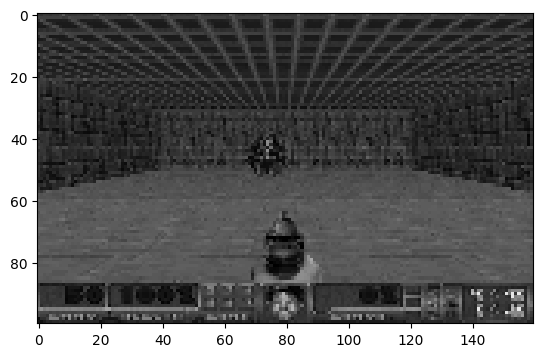

In [77]:
plt.imshow(cv2.cvtColor(state, cv2.COLOR_BGR2RGB))

# 4. Setup Callback

In [87]:
%pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu121

Looking in indexes: https://download.pytorch.org/whl/cu121
INFO: pip is looking at multiple versions of torchvision to determine which version is compatible with other requirements. This could take a while.
  Using cached https://download.pytorch.org/whl/cu121/torchvision-0.18.1%2Bcu121-cp38-cp38-win_amd64.whl (5.7 MB)
INFO: pip is looking at multiple versions of torchaudio to determine which version is compatible with other requirements. This could take a while.
  Using cached https://download.pytorch.org/whl/cu121/torchaudio-2.3.1%2Bcu121-cp38-cp38-win_amd64.whl (4.1 MB)
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.11.2+cu113
    Uninstalling torchvision-0.11.2+cu113:
      Successfully uninstalled torchvision-0.11.2+cu113
  Attempting uninstall: torchaudio
    Found existing installation: torchaudio 0.10.1+cu113
    Uninstalling torchaudio-0.10.1+cu113:
      Successfully uninstalled torchaudio-0.10.1+cu113
Note: you may need to restart the kern

In [78]:
%pip install stable-baselines3[extra]

Note: you may need to restart the kernel to use updated packages.


In [8]:
# Import os for file nav
import os 
# Import callback class from sb3
from stable_baselines3.common.callbacks import BaseCallback

In [9]:
class TrainAndLoggingCallback(BaseCallback):

    def __init__(self, check_freq, save_path, verbose=1):
        super(TrainAndLoggingCallback, self).__init__(verbose)
        self.check_freq = check_freq
        self.save_path = save_path

    def _init_callback(self):
        if self.save_path is not None:
            os.makedirs(self.save_path, exist_ok=True)

    def _on_step(self):
        if self.n_calls % self.check_freq == 0:
            model_path = os.path.join(self.save_path, 'best_model_{}'.format(self.n_calls))
            self.model.save(model_path)

        return True

In [81]:
CHECKPOINT_DIR = './train/train_basic'
LOG_DIR = './logs/log_basic'

In [82]:
callback = TrainAndLoggingCallback(check_freq=10000, save_path=CHECKPOINT_DIR)

# 5. Train Model

In [7]:
# import ppo for training
from stable_baselines3 import PPO

In [84]:
# Non rendered environment
env = VizDoomGym()

In [ ]:
model = PPO('CnnPolicy', env, tensorboard_log=LOG_DIR, verbose=1, learning_rate=0.0001, n_steps=2048)

In [ ]:
model.learn(total_timesteps=100000)

# 6. Test the Model

In [13]:
# Import eval policy to test agent
from stable_baselines3.common.evaluation import evaluate_policy

In [9]:
# Reload model from disc
model = PPO.load('saved_models\\vizdoom_saved_models\\Basic100k.zip')

c:\Users\mvswa\reinforcement\.venv\lib\site-packages\stable_baselines3\common\save_util.py:167: UserWarning: Could not deserialize object lr_schedule. Consider using `custom_objects` argument to replace this object.
Exception: an integer is required (got type bytes)
  warnings.warn(
c:\Users\mvswa\reinforcement\.venv\lib\site-packages\stable_baselines3\common\save_util.py:167: UserWarning: Could not deserialize object clip_range. Consider using `custom_objects` argument to replace this object.
Exception: an integer is required (got type bytes)
  warnings.warn(
c:\Users\mvswa\reinforcement\.venv\lib\site-packages\stable_baselines3\common\vec_env\patch_gym.py:95: UserWarning: You loaded a model that was trained using OpenAI Gym. We strongly recommend transitioning to Gymnasium by saving that model again.
  warnings.warn(
c:\Users\mvswa\reinforcement\.venv\lib\site-packages\stable_baselines3\common\base_class.py:751: UserWarning: You are probably loading a model saved with SB3 < 1.7.0, we

In [16]:
# Create rendered environment
env = VizDoomGym(render=True)

In [ ]:
# Evaluate mean reward for 10 games
mean_reward, _ = evaluate_policy(model, env, n_eval_episodes=100)

In [ ]:
mean_reward

In [13]:
model.predict(obs)

(array(2, dtype=int64), None)

In [17]:
for episode in range(100): 
    obs = env.reset()
    done = False
    total_reward = 0
    while not done: 
        action, _ = model.predict(obs)
        obs, reward, done, info = env.step(action)
        # time.sleep(0.20)
        total_reward += reward
    print('Total Reward for episode {} is {}'.format(total_reward, episode))
    time.sleep(2)

AttributeError: 'NoneType' object has no attribute 'shape'

In [14]:
env.close()